<h1><strong>Rahims Spotipy Analysis for the Top 100 streamed songs</strong></h1>
<p>Is there a correlation between the <span style="text-decoration: underline;"><strong><span style="color: #ff0000; text-decoration: underline;">loudness</span> </strong></span>of track and its <span style="color: #ff0000;"><strong>E<span style="text-decoration: underline;">nergy</span>?</strong></span></p>
<p style="text-align: left; padding-left: 40px;"><span style="color: #000000;"><strong>First we have to define what these variables are.</strong></span></p>
<ul>
<li style="text-align: left;"><span style="color: #000000;"><strong>Loudness: </strong>Overall track decibels. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.</span></li>
<li style="text-align: left;"><span style="color: #000000;"><strong>Energy: </strong>Represents a perceptual measure of intensity and activity in a song. Energy is a measure&nbsp;<strong>from</strong> 0.0 to 1.0; the higher the energy score the more intense.</span></li>
</ul>
<p>&nbsp;</p>
<p>&nbsp;</p>

In [1]:
# Import relevant libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

import os
%matplotlib inline
import squarify 
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
from scipy.stats import linregress
from scipy.stats import norm

In [2]:
## Grab the spotify data file and sort into data into data frames.
tracks = pd.read_csv("tracks.csv", converters ={'artist_genres':eval})

streamcounts = pd.read_csv("stream-counts.csv")
data = pd.read_csv("spotify-data.csv")
#cc = pd.read_csv("Country Codes.csv")

#Converting CSVs into DataFrames Intended to also create a GMAP for the locations of the songs using the below
country_codes_df = pd.DataFrame(cc)
country_codes_df = country_codes_df.drop(columns=["Notes", "ccTLD",'Year'])
country_codes_df = country_codes_df.set_index("Code")
#tracks_df = pd.DataFrame(tracks)
#data_df = pd.DataFrame(data)
#streamcounts_df = pd.DataFrame(streamcounts)
#filter data 
newtrack = tracks[["artist_name","artist_genres","streams (millions)","markets","followers"]]

streamcounts = streamcounts.set_index("Rank")
streamcounts = streamcounts.drop(columns=["Album", "Date published", "Ref."])


In [76]:
data

,artist_name,artist_genres,album_id,album_name,track_id,track_name,streams (millions),popularity,release_date,markets,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,Ed Sheeran,"['pop', 'uk pop']",3T4tUhGYeRNVUGevb0wThu,÷ (Deluxe),7qiZfU4dY1lWllzX7mPBI3,Shape of You,2989,87,2017-03-03,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,0.0931,-3.183,0.0,0.0802,95.977,4.0,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,audio_features,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.931
1,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",4yP0hdKOZPNshxUOjY0cZj,After Hours,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,2673,93,2020-03-20,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,0.0897,-5.934,1.0,0.0598,171.005,4.0,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,audio_features,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,0.334
2,Tones And I,"['australian pop', 'pop']",0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,2425,82,2019-10-17,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,0.1490,-6.400,0.0,0.0924,98.027,4.0,https://api.spotify.com/v1/tracks/2XU0oxnq2qxC...,audio_features,spotify:track:2XU0oxnq2qxCpomAAuJY8K,0.513
3,Post Malone,"['dfw rap', 'melodic rap', 'rap']",6trNtQUgC8cgbWcqoMYkOR,beerbongs & bentleys,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),2312,85,2018-04-27,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,0.1310,-6.136,0.0,0.0712,159.801,4.0,https://api.spotify.com/v1/tracks/0e7ipj03S05B...,audio_features,spotify:track:0e7ipj03S05BNilyu5bRzt,0.129
4,Lewis Capaldi,"['pop', 'uk pop']",5658aM19fA3JVwTK6eQX70,Divinely Uninspired To A Hellish Extent,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,2182,88,2019-05-17,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,0.1050,-5.679,1.0,0.0319,109.891,4.0,https://api.spotify.com/v1/tracks/7qEHsqek33rT...,audio_features,spotify:track:7qEHsqek33rTcFNT9PFqLf,0.446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,benny blanco,"['electropop', 'pop', 'pop rap']",7pkLXlFdpQDfmHujT2AbBK,Eastside (with Halsey & Khalid),0d2iYfpKoM0QCKvcLCkBao,Eastside (with Halsey & Khalid),1247,79,2018-07-12,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,0.1160,-7.648,0.0,0.3210,89.391,4.0,https://api.spotify.com/v1/tracks/0d2iYfpKoM0Q...,audio_features,spotify:track:0d2iYfpKoM0QCKvcLCkBao,0.319
96,Charlie Puth,"['dance pop', 'pop', 'viral pop']",6E0p38TjcK490itZ1Ns7bD,Nine Track Mind,68EMU2RD1ECNeOeJ5qAXCV,We Don't Talk Anymore (feat. Selena Gomez),1243,59,2015-11-05,['GB'],...,0.1790,-8.053,0.0,0.1340,100.017,4.0,https://api.spotify.com/v1/tracks/68EMU2RD1ECN...,audio_features,spotify:track:68EMU2RD1ECNeOeJ5qAXCV,0.352
97,Major Lazer,"['dance pop', 'edm', 'electro house', 'moombah...",4SpuU8HT32EymGgFPL08LE,Cold Water (feat. Justin Bieber & MØ),6Bjtr3tPdto5nyuLYf61sN,Cold Water (feat. Justin Bieber & MØ),1238,72,2016-07-22,"['AD', 'AE', 'AL', 'AO', 'AR', 'AT', 'AZ', 'BA...",...,0.1560,-5.092,0.0,0.0432,92.943,4.0,https://api.spotify.com/v1/tracks/6Bjtr3tPdto5...,audio_features,spotify:track:6Bjtr3tPdto5nyuLYf61sN,0.501
98,OMI,['dance pop'],7cVXH4slEYzGjDh498OFyL,Me 4 U,7vFoFDWqTX0mHzLfrF1Cfy,Cheerleader - Felix Jaehn Remix Radio Edit,1235,78,2015-10-16,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,0.1600,-6.237,1.0,0.0309,118.016,4.0,https://api.spotify.com/v1/tracks/7vFoFDWqTX0m...,audio_features,spotify:track:7vFoFDWqTX0mHzLfrF1Cfy,0.603


<p><span style="color: #000000;">Initallly I wanted to visualise top genres in the sample, in a piechart, however due to the quanity of the output, having a piechart provided no value as the output was more than expected. This lead to a the following.</span></p>
<p><span style="color: #000000;">Reasons for not using in report:</span></p>
<ul>
<li>Not legible</li>
</ul>
<p>&nbsp;</p>

([<matplotlib.patches.Wedge at 0x21669b4fb50>,
 [Text(0.8874350430111453, 0.6499684949563377, 'acoustic pop'),
  Text(-0.010535683630463933, 1.0999495440111964, 'alternative rock'),
  Text(-0.5530386355151955, 0.950867113548203, 'art pop'),
  Text(-0.8212085464889508, 0.7318582671347676, 'australian dance'),
  Text(-0.9663634734520319, 0.5254918050528706, 'australian pop'),
  Text(-1.0578384343732519, 0.30162534171177935, 'beatlesque'),
  Text(-1.097528571419125, 0.07369555562376247, 'boy band'),
  Text(-1.0901253876147312, -0.14705998530474684, 'britpop'),
  Text(-1.042186247537992, -0.35192019754864823, 'brostep'),
  Text(-0.9612860423310907, -0.5347234283435022, 'cali rap'),
  Text(-0.861888249167641, -0.6834827327348795, 'canadian contemporary r&b'),
  Text(-0.7474541388181045, -0.8070392247986995, 'canadian hip hop'),
  Text(-0.62420405880869, -0.9057423987904937, 'canadian pop'),
  Text(-0.49751112757579385, -0.9810620153375944, 'chicago rap'),
  Text(-0.37181855900934346, -1.035

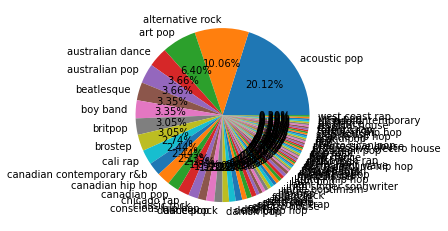

In [6]:
#newtrack['artist_genres'].explode().value_counts()
#z.plot(kind = 'pie')
plt.pie(z, labels = genre_list, autopct = '%.2f%%') #not a good display of values

In [25]:
# Explode the column to give us indiviual values use .valucounts to count how many time each value was repeated
z = newtrack['artist_genres'].explode().value_counts()
a = newtrack["artist_genres"].apply(pd.Series).stack().reset_index(drop=True)
b = a.to_numpy()
b = np.unique(b) #np array
#conver np array to a list
genre_list = b.tolist()


0                            pop
1                         uk pop
2      canadian contemporary r&b
3                   canadian pop
4                            pop
                 ...            
323               tropical house
324                    dance pop
325    canadian contemporary r&b
326                 canadian pop
327                          pop
Length: 328, dtype: object

In [26]:
newtrack

,artist_name,artist_genres,streams (millions),markets,followers
0,Ed Sheeran,"[pop, uk pop]","2,989","['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",88961926
1,The Weeknd,"[canadian contemporary r&b, canadian pop, pop]","2,673","['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",39308599
2,Tones And I,"[australian pop, pop]","2,425","['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",2888374
3,Post Malone,"[dfw rap, melodic rap, rap]","2,312","['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",35093420
4,Lewis Capaldi,"[pop, uk pop]","2,182","['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",8940823
...,...,...,...,...,...
95,benny blanco,"[electropop, pop, pop rap]","1,247","['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",849006
96,Charlie Puth,"[dance pop, pop, viral pop]","1,243",['GB'],14626796
97,Major Lazer,"[dance pop, edm, electro house, moombahton, po...","1,238","['AD', 'AE', 'AL', 'AO', 'AR', 'AT', 'AZ', 'BA...",6250081
98,OMI,[dance pop],"1,235","['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",584717


ValueError: The number of FixedLocator locations (25), usually from a call to set_ticks, does not match the number of ticklabels (73).

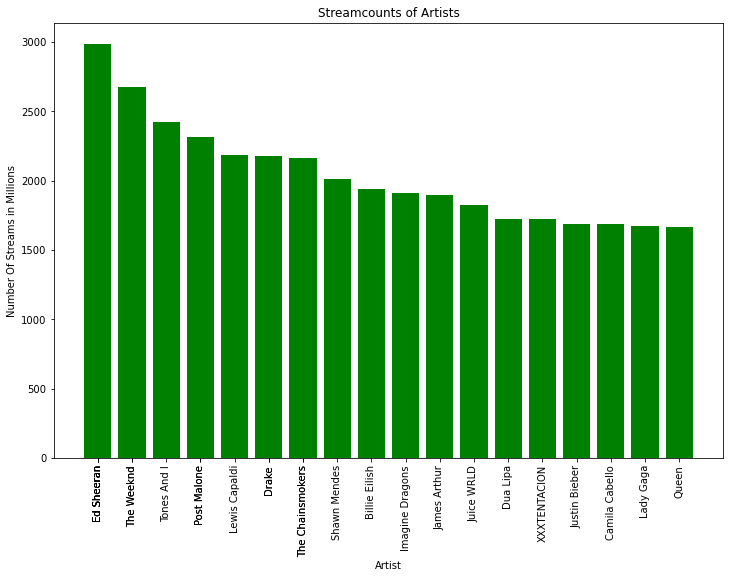

In [75]:
z = newtrack["artist_genres"].explode().value_counts()
data['streams (millions)']=data['streams (millions)'].astype(int)
x_pos = data['artist_name'][0:25]
y_pos = data['streams (millions)'][0:25]
fig = plt.figure(figsize=(12,8))
plt.bar(x_pos,y_pos, color='green')
plt.xlabel("Artist")
plt.ylabel("Number Of Streams in Millions")
plt.title("Streamcounts of Artists")
plt.xticks(rotation='vertical')
plt.xticks(x_pos, z, rotation = 90)



plt.show()

In [48]:

pip install matplotlib==3.2.0

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\rahim\\anaconda3\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:


In [10]:
#Creating the a bar chart for the top 25 genres in spotify
x_axis = np.arange(len(z))
tick_locations = [value for value in x_axis]
labels = list(z.keys())
fig = plt.figure(figsize=(9, 6), dpi=1000)

plt.xlabel("Types of Genres repeated in the top 25")
plt.ylabel("Count")
plt.title("Number of times the Genre was repeated in the top 25")

plt.bar(x_axis, z, width = 0.8 )
plt.xticks(tick_locations, labels, rotation = 90)
plt.show()




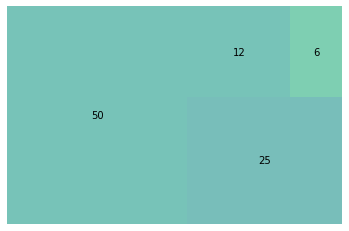

In [11]:
#Testing Tree maps
sizes=[50, 25, 12, 6]
label=["50", "25", "12", "6"]
squarify.plot(sizes=sizes, label=label, alpha=0.6 )
plt.axis('off')
plt.show()

(0.0, 100.0, 0.0, 100.0)

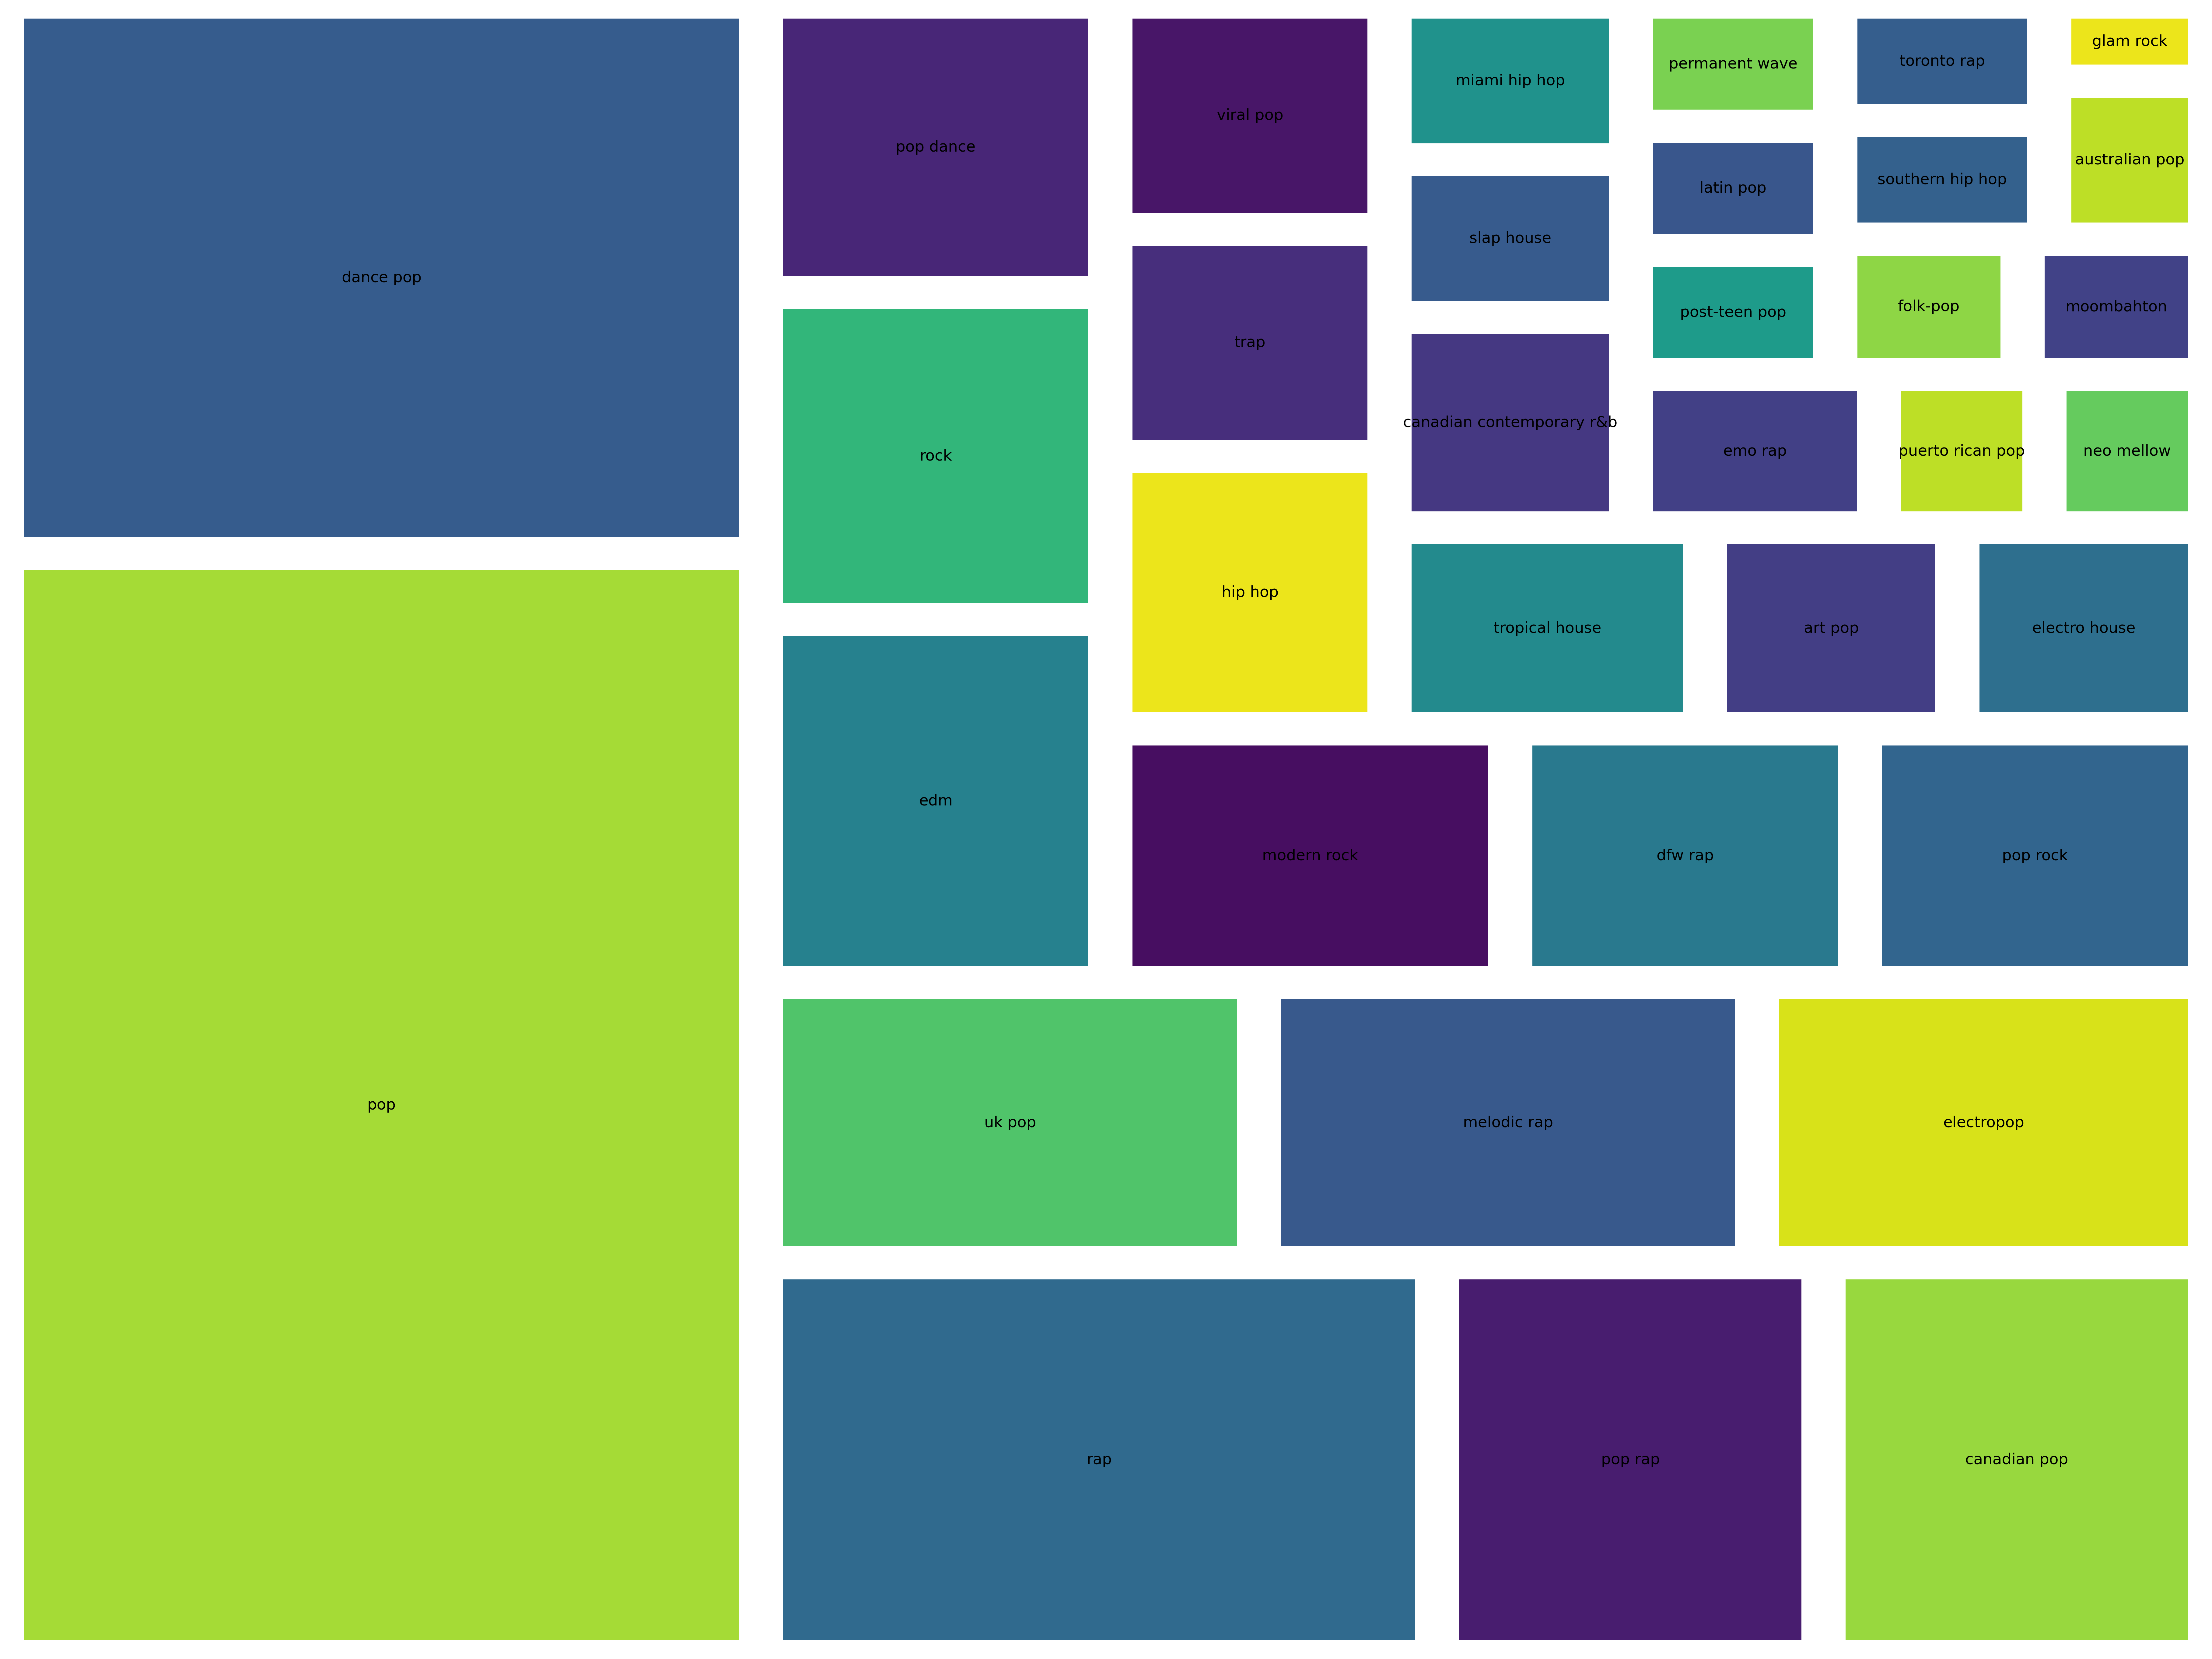

In [13]:
#Tree maps for the top genres in spotify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(130,100 )
squarify.plot(z, label= list(z_df.index.values), pad = True, text_kwargs={'fontsize':50})
plt.axis('off')
z_df = z.to_frame(name = 'count') #convert z into a dataframe


In [ ]:
import plotly.express as px

In [80]:
#Ran out of time but I intended on creating an interactive tree diagram to show data
fig = px.treemap(z_df, path=['count'])
fig.show()
    #fig = px.treemap(
   # names = [y_pos],
    #parents = [x_pos]
#)
#fig.update_traces(root_color="lightgrey")
#fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
#fig.show()
test_list = (list(z_df.index.values))
with_rap = (z for z in test_list if z.endswith('rap'))
with_house = [h for h in test_list if h.endswith('house')]
with_rap = [y for y in test_list if y.endswith('rap')]
with_pop = [x for x in test_list if x.endswith('pop')]




Accoustic and energy Correlation

R squared: 0.5434088173021023
There is a Strong postive correlation between the loudness of a track to its energy, the r value is 0.7371626803508858


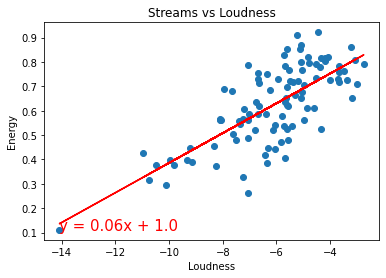

'y = 0.06x + 1.0'

In [18]:
# Create x and y values
y_values = data['energy']
x_values = data["loudness"] 

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")

# Plot scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot
plt.xlabel("Loudness")
plt.ylabel("Energy")
plt.title("Streams vs Loudness")
rvalue
print(f"R squared: {rvalue**2}")
print(f"There is a Strong postive correlation between the loudness of a track to its energy, the r value is {rvalue}")
plt.show()
line_eq


In [20]:

data['streams (millions)']=data['streams (millions)'].str.replace(',','')
data['streams (millions)']=data['streams (millions)'].astype(int)